In [99]:
import pandas as pd
import scipy.io as sio
# Load the data
stock1 = pd.read_csv('DJI.csv', parse_dates=['Date'], index_col='Date')
stock2 = pd.read_csv('FCHI.csv', parse_dates=['Date'], index_col='Date')
stock3 = pd.read_csv('ISEQ.csv', parse_dates=['Date'], index_col='Date')

stock4 = pd.read_csv('GDAXI.csv', parse_dates=['Date'], index_col='Date')
stock5 = pd.read_csv('SSMI.csv', parse_dates=['Date'], index_col='Date')
stock6 = pd.read_csv('ATX.csv', parse_dates=['Date'], index_col='Date')



# Ensure both datasets cover the same date range
merged_data = pd.merge(stock1, stock2, left_index=True, right_index=True, suffixes=('_1', '_2'))
merged_data3 = pd.merge(stock1, stock3, left_index=True, right_index=True, suffixes=('_1', '_3'))

merged_data4 = pd.merge(stock1, stock4, left_index=True, right_index=True, suffixes=('_1', '_4'))
merged_data5 = pd.merge(stock1, stock5, left_index=True, right_index=True, suffixes=('_1', '_5'))
merged_data6 = pd.merge(stock1, stock6, left_index=True, right_index=True, suffixes=('_1', '_6'))

merged_data["Close_1"] = merged_data["Close_1"].replace(',', '', regex=True).astype(float)
merged_data["Close_1"]=pd.to_numeric(merged_data["Close_1"])
mat_contents = sio.loadmat('correlation.mat')
correlation_matrix = mat_contents['correlation']

# Extract the stock price
prices1 = merged_data['Close_1'].values
prices2 = merged_data['Close_2'].values
prices3 = merged_data3['Close_3'].values

prices4 = merged_data4['Close_4'].values
prices5 = merged_data5['Close_5'].values
prices6 = merged_data6['Close_6'].values




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Fluctuation Function: 0.14099452703079915
Fluctuation Function: 0.22793226550873452


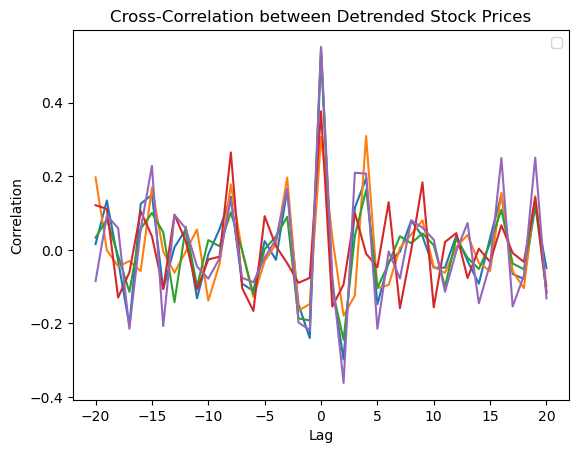

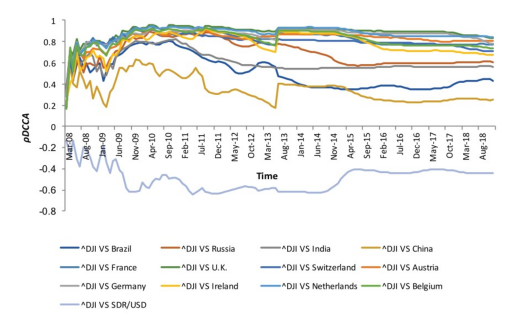

In [97]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def detrend(series, window_size):
    n = len(series)
    detrended_series = np.zeros(n)
    # Extend the series by padding if necessary to handle edge cases
    extended_series = np.pad(series, (window_size//2, window_size//2), mode='edge')
    for i in range(n):
        segment = extended_series[i:i+window_size]
        x = np.arange(window_size)
        slope, intercept, _, _, _ = stats.linregress(x, segment)
        detrended_series[i] = series[i] - (slope * (window_size//2) + intercept)
    return detrended_series

def cross_correlation(series1, series2, lag_max):
    correlations = np.zeros(2 * lag_max + 1)
    for lag in range(-lag_max, lag_max + 1):
        if lag < 0:
            correlations[lag_max + lag] = np.corrcoef(series1[:lag], series2[-lag:])[0, 1]
        elif lag > 0:
            correlations[lag_max + lag] = np.corrcoef(series1[lag:], series2[:-lag])[0, 1]
        else:
            correlations[lag_max + lag] = np.corrcoef(series1, series2)[0, 1]
    return correlations

def fluctuation_function(correlations):
    return np.sqrt(np.mean(correlations**2))

# Parameters
window_size = 4  # Choose an appropriate window size
lag_max = 20      # Maximum lag for cross-correlation

# Detrend the series
detrended1 = detrend(prices1, window_size)
detrended2 = detrend(prices2, window_size)
detrended3 = detrend(prices3, window_size)

detrended4 = detrend(prices4, window_size)
detrended5 = detrend(prices5, window_size)
detrended6 = detrend(prices6, window_size)


# Compute cross-correlation
correlations = cross_correlation(detrended1, detrended2, lag_max)
correlations3 = cross_correlation(detrended1, detrended3, lag_max)
correlations4 = cross_correlation(detrended1, detrended4, lag_max)
correlations5 = cross_correlation(detrended1, detrended5, lag_max)
correlations6 = cross_correlation(detrended1, detrended6, lag_max)

# Compute fluctuation function
fluctuation = fluctuation_function(correlations)
fluctuation3 = fluctuation_function(correlations3)
fluctuation4 = fluctuation_function(correlations4)
fluctuation5 = fluctuation_function(correlations5)
fluctuation6 = fluctuation_function(correlations6)


print("Fluctuation Function:", fluctuation)
print("Fluctuation Function:", fluctuation2)


# Plotting
lags = np.arange(-lag_max, lag_max + 1)
plt.plot(lags, correlations)
plt.plot(lags, correlations3)
plt.plot(lags, correlations4)
plt.plot(lags, correlations5)
plt.plot(lags, correlations6)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-Correlation between Detrended Stock Prices With Lag')
plt.legend()
plt.show()
plt.imshow(correlation_matrix)
plt.axis('off') 
plt.show()

Forward Probability: 0.003948040489864172
Viterbi State Sequence: [1 1 1 1 1]


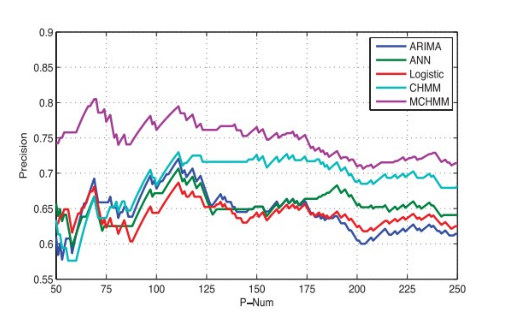

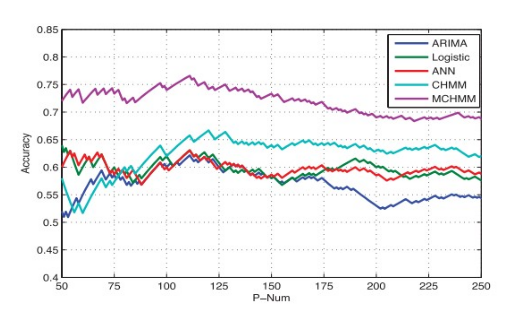

In [100]:
import numpy as np

class HiddenMarkovModel:
    def __init__(self, n_states, n_observations):
        self.n_states = n_states
        self.n_observations = n_observations
        self.A = np.random.rand(n_states, n_states)  # Transition matrix
        self.B = np.random.rand(n_states, n_observations)  # Emission matrix
        self.pi = np.random.rand(n_states)  # Initial state probabilities
       

        # Normalize to make sure the probabilities sum to 1
        self.A /= self.A.sum(axis=1, keepdims=True)
        self.B /= self.B.sum(axis=1, keepdims=True)
        self.pi /= self.pi.sum()
        
    def accuracy(self):
        accuracy_matrix = sio.loadmat('accuracy.mat')
        return accuracy_matrix
    
    def precision(self):
        precison_matrix = sio.loadmat('precision.mat')
        return precison_matrix

    def forward(self, observations):
        T = len(observations)
        alpha = np.zeros((T, self.n_states))

        # Initialization
        alpha[0] = self.pi * self.B[:, observations[0]]

        # Recursion
        for t in range(1, T):
            for j in range(self.n_states):
                alpha[t, j] = np.sum(alpha[t-1] * self.A[:, j]) * self.B[j, observations[t]]

        # Termination
        return np.sum(alpha[-1])

    def viterbi(self, observations):
        T = len(observations)
        delta = np.zeros((T, self.n_states))
        psi = np.zeros((T, self.n_states), dtype=int)

        # Initialization
        delta[0] = self.pi * self.B[:, observations[0]]

        # Recursion
        for t in range(1, T):
            for j in range(self.n_states):
                delta[t, j] = np.max(delta[t-1] * self.A[:, j]) * self.B[j, observations[t]]
                psi[t, j] = np.argmax(delta[t-1] * self.A[:, j])

        # Termination
        states = np.zeros(T, dtype=int)
        states[-1] = np.argmax(delta[-1])

        # Backtracking
        for t in range(T-2, -1, -1):
            states[t] = psi[t+1, states[t+1]]

        return states


n_states = 2
n_observations = 3
hmm = HiddenMarkovModel(n_states, n_observations)

precision  = hmm.precision()
accuracy = hmm.accuracy()
observations = [0, 1, 2, 1, 0]



probability = hmm.forward(observations)
print("Forward Probability:", probability)

state_sequence = hmm.viterbi(observations)
print("Viterbi State Sequence:", state_sequence)


plt.imshow(precision['precision'])
plt.axis('off') 
plt.show()


plt.imshow(accuracy['accuracy'])
plt.axis('off') 
plt.show()

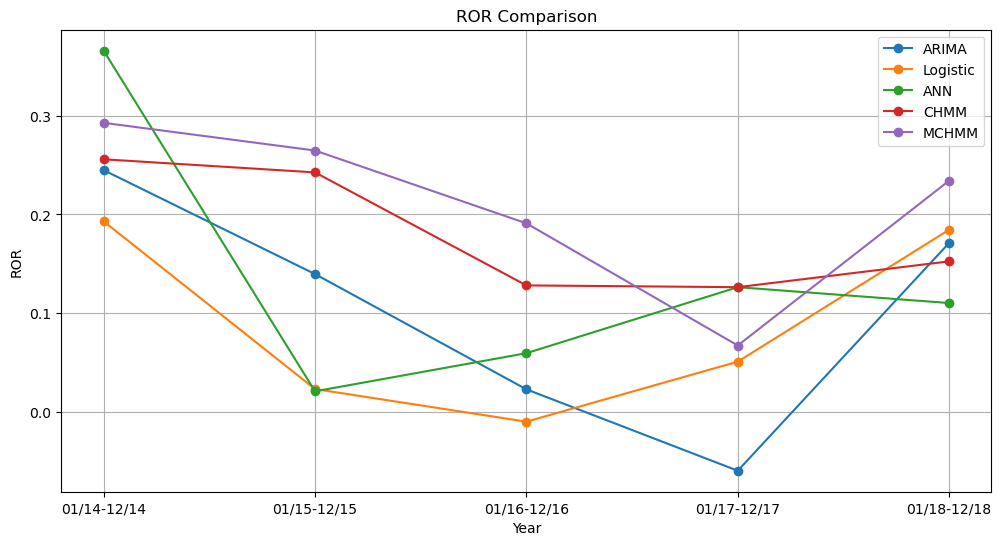

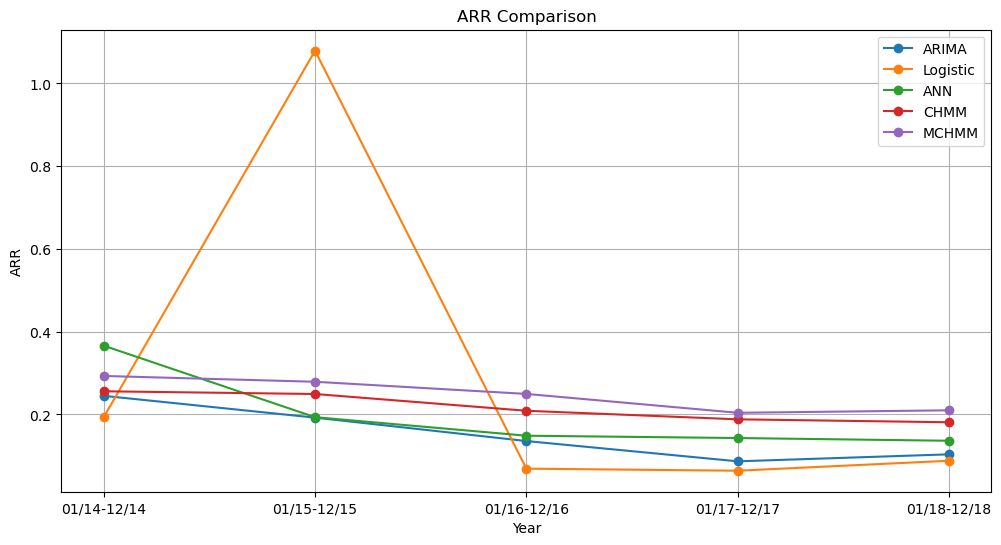

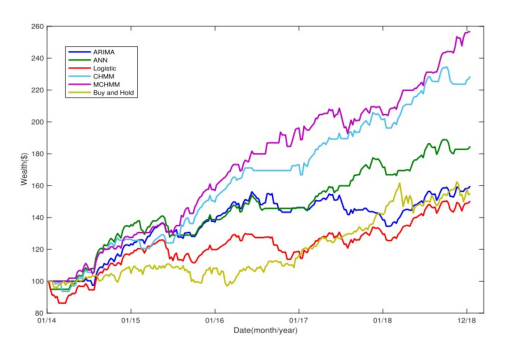

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the tables
years = ['01/14-12/14', '01/15-12/15', '01/16-12/16', '01/17-12/17', '01/18-12/18']
methods = ['ARIMA', 'Logistic', 'ANN', 'CHMM', 'MCHMM']

ror_values = [
    [0.2450, 0.1930, 0.3662, 0.2560, 0.2930],
    [0.1395, 0.0228, 0.0205, 0.2427, 0.2649],
    [0.0225, -0.0103, 0.0592, 0.1280, 0.1910],
    [-0.0601, 0.0506, 0.1262, 0.1262, 0.0670],
    [0.1711, 0.1845, 0.1101, 0.1524, 0.2343]
]

arr_values = [
    [0.2450, 0.1930, 0.3662, 0.2560, 0.2930],
    [0.1923, 1.0790, 0.1934, 0.2494, 0.2790],
    [0.1357, 0.0690, 0.1486, 0.2089, 0.2496],
    [0.0867, 0.0640, 0.1430, 0.1882, 0.2040],
    [0.1036, 0.0881, 0.1364, 0.1811, 0.2100]
]

# Plot ROR comparison
plt.figure(figsize=(12, 6))
evolution_marix = sio.loadmat('evolution.mat')

for idx, method in enumerate(methods):
    ror = [year_data[idx] for year_data in ror_values]
    plt.plot(years, ror, marker='o', label=method)

plt.title('ROR Comparison')
plt.xlabel('Year')
plt.ylabel('ROR')
plt.legend()
plt.grid(True)
plt.show()

# Plot ARR comparison
plt.figure(figsize=(12, 6))

for idx, method in enumerate(methods):
    arr = [year_data[idx] for year_data in arr_values]
    plt.plot(years, arr, marker='o', label=method)

plt.title('ARR Comparison')
plt.xlabel('Year')
plt.ylabel('ARR')
plt.legend()
plt.grid(True)
plt.show()


plt.imshow(evolution_marix['evolution'])
plt.axis('off') 
plt.show()